### Generate X_train.npy and etc.

In [1]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [2]:
csv_file = '/home/zxt/data/df1.csv'
csv_data = pd.read_csv(csv_file, low_memory=False) # prevent the warning message
df1 = pd.DataFrame(csv_data)

In [3]:
df1.head()

,image_id,label
0,59328b52-23d2-11e8-a6a3-ec086b02610b.jpg,0
1,592de344-23d2-11e8-a6a3-ec086b02610b.jpg,1
2,58bb8bb2-23d2-11e8-a6a3-ec086b02610b.jpg,1
3,58fbeca0-23d2-11e8-a6a3-ec086b02610b.jpg,1
4,593ef7b2-23d2-11e8-a6a3-ec086b02610b.jpg,1


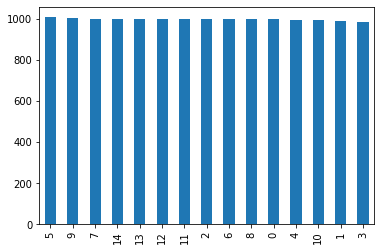

In [4]:
df1['label'].value_counts().plot.bar()
plt.show()

In [5]:
train_df, validate0_df = train_test_split(df1, test_size=0.30, random_state=523)
train_df = train_df.reset_index(drop=True)
validate0_df = validate0_df.reset_index(drop=True)

In [6]:
validate_df, test_df = train_test_split(validate0_df, test_size=0.30, random_state=912)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [10]:
len(train_df)

10472

In [9]:
path='/home/zxt/data/test/picked_data_caltech/'

train dataset

In [18]:
imglist = train_df['image_id'].tolist()
X_train = np.empty((len(imglist),227,227,3))
X_train.shape

(10472, 227, 227, 3)

In [14]:
Y_train = np.empty((len(imglist),1))
Y_train.shape

(10472, 1)

In [20]:
img_name

'5a0e37e7-23d2-11e8-a6a3-ec086b02610b.jpg'

In [21]:
path+img_name

'/home/zxt/data/test/picked_data_caltech/5a0e37e7-23d2-11e8-a6a3-ec086b02610b.jpg'

In [22]:
len(nonelist)

10472

In [24]:
count=0
nonelist=[]
for img_name in imglist:
    img_path = path + img_name
    try:
        img = image.load_img(img_path, target_size=(227,227))
        X_train[count]=img
        count+=1
    except:
        nonelist.append(img_path)

In [25]:
np.save('X_train',X_train)

In [26]:
label = train_df['label']
Y_train = [i for i in label]
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(len(Y_train),1)
Y_train.shape

(10472, 1)

In [27]:
np.save('Y_train',Y_train)

validate dataset

In [11]:
validate_df.shape

(3142, 2)

In [12]:
imglist = validate_df['image_id'].tolist()
X_validate = np.empty((len(imglist),227,227,3))
X_validate.shape

(3142, 227, 227, 3)

In [13]:
count=0
nonelist=[]
for img_name in imglist:
    img_path = path + img_name
    try:
        img = image.load_img(img_path, target_size=(227,227))
        X_validate[count]=img
        count+=1
    except:
        nonelist.append(img_path)

In [14]:
label = validate_df['label']
Y_validate = [i for i in label]
Y_validate = np.array(Y_validate)
Y_validate = Y_validate.reshape(len(Y_validate),1)
Y_validate.shape

(3142, 1)

In [15]:
Y_validate[:2]

array([[8],
       [6]])

In [16]:
np.save('X_validate',X_validate)
np.save('Y_validate',Y_validate)

test dataset

In [17]:
imglist = test_df['image_id'].tolist()
X_test = np.empty((len(imglist),227,227,3))
X_test.shape

(1347, 227, 227, 3)

In [18]:
count=0
nonelist=[]
for img_name in imglist:
    img_path = path + img_name
    try:
        img = image.load_img(img_path, target_size=(227,227))
        X_test[count]=img
        count+=1
    except:
        nonelist.append(img_path)

In [19]:
label = test_df['label']
Y_test = [i for i in label]
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(len(Y_test),1)
Y_test.shape

(1347, 1)

In [20]:
test_df[:2]

,image_id,label
0,59c4bef7-23d2-11e8-a6a3-ec086b02610b.jpg,5
1,59a94d27-23d2-11e8-a6a3-ec086b02610b.jpg,0


In [21]:
Y_test[:2]

array([[5],
       [0]])

In [22]:
np.save('X_test',X_test)
np.save('Y_test',Y_test)